### 3주차 필수과제
- bike 데이터를 가지고 위의 보간법 진행
- 실제 bike 데이터를 가지고 보간법 후에 시각화를 통해서 어떤 식으로 변화하는지 체크
- 수업시간 배운것외에 2~3가지 진행 (보간법 사용방법)

In [1]:
# 필요한 라이브러리 설치
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bike_sharing_daily.csv')

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [4]:
# 결측치 확인
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [5]:
# 결측치가 발생한 위치 파악
df_registered=df['registered']
df_registered[df_registered.isna()]

14    NaN
88    NaN
280   NaN
370   NaN
471   NaN
564   NaN
600   NaN
609   NaN
702   NaN
708   NaN
725   NaN
Name: registered, dtype: float64

<Axes: >

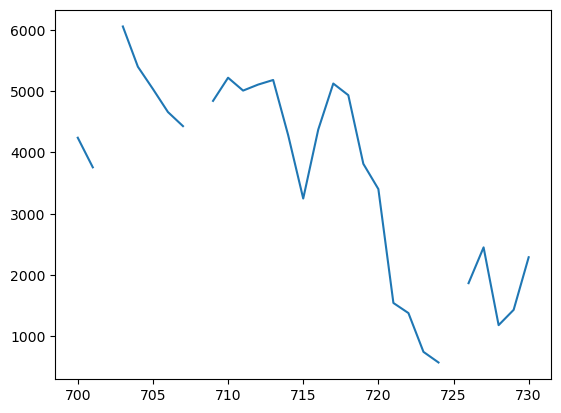

In [7]:
# 원하는 부분의 결측치 슬라이싱
df_registered_slice=df_registered.iloc[700:750]
df_registered_slice.plot()

<Axes: >

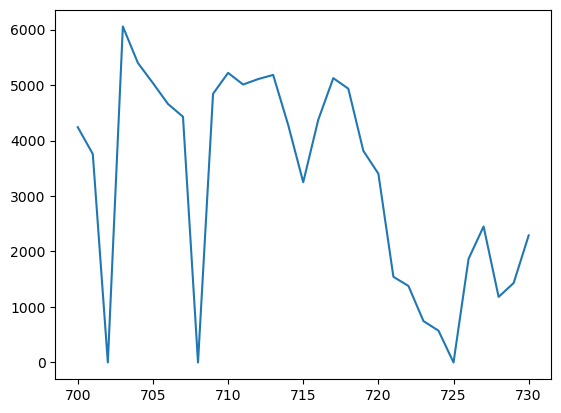

In [8]:
# 결측치에 0 입력 후 결측치 위치 확인
df_registered_slice.fillna(0).plot()

<Axes: >

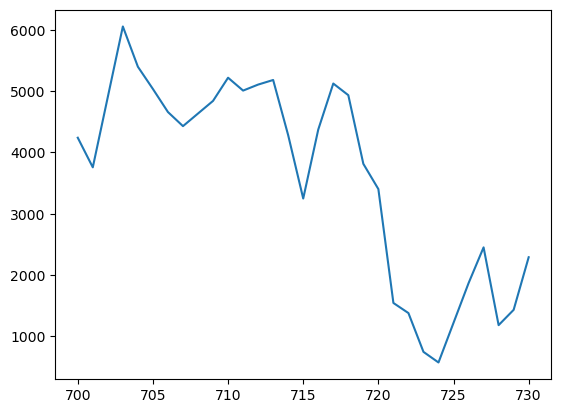

In [9]:
# 선형 보간법 linear 사용
df_registered_slice.interpolate(method='linear').plot()

<Axes: >

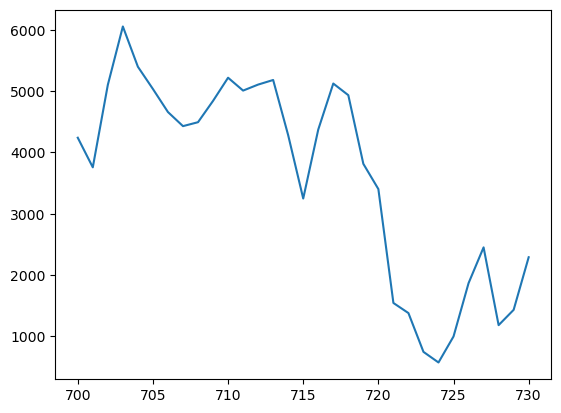

In [10]:
# cubic 사용
df_registered_slice.interpolate(method='cubic').plot()

<Axes: >

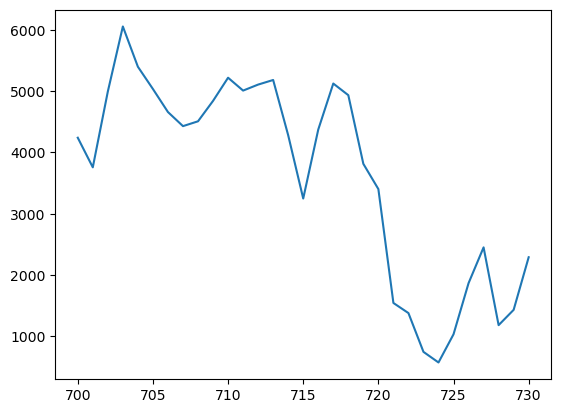

In [11]:
# spline 사용 (2차원 형태)
df_registered_slice.interpolate(method='spline',order=2).plot()

<Axes: >

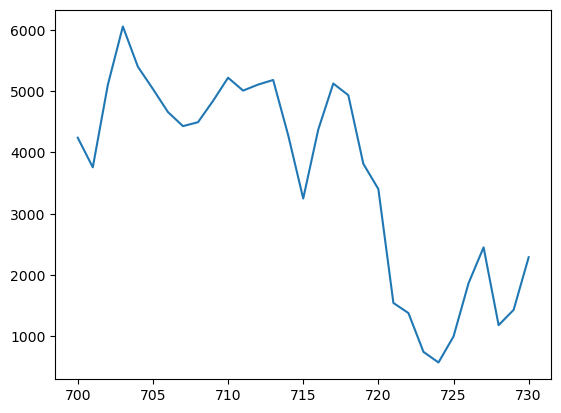

In [12]:
# spline 사용 (3차원 형태)
df_registered_slice.interpolate(method='spline',order=3).plot()

<Axes: >

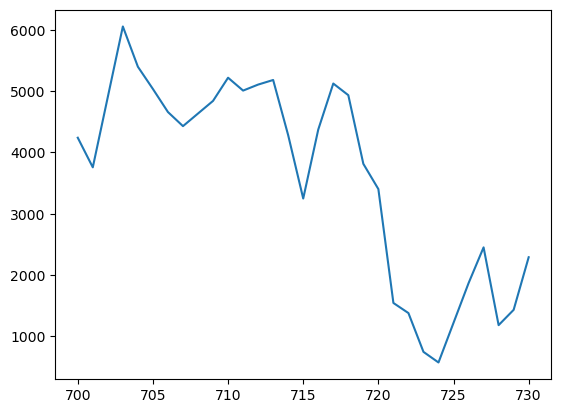

In [13]:
# index 사용
df_registered_slice.interpolate(method='index').plot()